### Initialize

In [3]:
from __future__ import print_function, division
%matplotlib inline
from matplotlib import pyplot as plt
import json
import random
import debiaswe as dwe
import debiaswe.we as we
from debiaswe.we import WordEmbedding
from debiaswe.debias import debias

# Standard python helper libraries.
import os, sys, re, json, time
import itertools, collections
#from importlib import reload
from IPython.display import display

# NumPy and SciPy for matrix ops
import numpy as np
import scipy.sparse

# Visualize
import matplotlib.pyplot as plt

# NLTK for NLP utils
import nltk

# PCA 
from sklearn.decomposition import PCA

# Helper libraries
from w266_common import utils, vocabulary#, tf_embed_viz

## PCA

In [5]:
# load subset of word embedding trained on Google News text
E = WordEmbedding("./embeddings/w2v_gnews_small.txt")
E2 = WordEmbedding("./embeddings/article_embed.txt")

*** Reading data from ./embeddings/w2v_gnews_small.txt
(26423, 300)
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
*** Reading data from ./embeddings/article_embed.txt
(462643, 50)
462643 words of dimension 50 : the, to, of, and, ..., sadaoui, craythorn, calcraft, coventon
462643 words of dimension 50 : the, to, of, and, ..., sadaoui, craythorn, calcraft, coventon


In [211]:
# difference between vectors of words a & b
# a and b are strings
    
def get_diffs(e,l):
    return np.array([e.diff(a,b) for a,b in l])

# plot top two principal components....
# create a scatter plot of the projection
def plot_2d(pcs,words):
    plt.scatter(pcs[:, 0], pcs[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(pcs[i, 0], pcs[i, 1]))
    plt.show()

### Load Data

In [229]:
with open('./data/definitional_pairs_gender.json', "r") as f:
    definitional_g = json.load(f) # no Mary and John
    
with open('./data/definitional_pairs_political.json', "r") as f:
    definitional_p = json.load(f) # no left-wing and right-wing

### Gender PCA

In [83]:
pca = PCA(n_components=10)

In [262]:
diffs = np.asarray([E2.diff(a,b) for a,b in definitional_g]) #update for which embeddings & words we want to use

In [263]:
result = pca.fit_transform(diffs)

In [264]:
result.shape # this always somehow tracks with the number of words in the list? Is that right?

(9, 9)

In [265]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[  3.63813311e-01   1.97318241e-01   1.64028585e-01   1.10277310e-01
   6.77936375e-02   4.90734167e-02   3.77541669e-02   9.94137395e-03
   7.71085771e-15]
1.00000004191


<Container object of 9 artists>

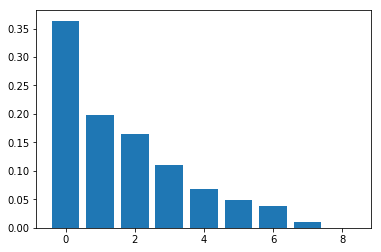

In [266]:
plt.bar(range(result.shape[0]),pca.explained_variance_ratio_)

In [282]:
# simulate random draws
v = []
n = 1000

unit_vecs = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, E.vecs)

for i in range(n):
    v.append(random.sample(unit_vecs, 10)) 
    
avg = np.mean(v,axis=0)

In [283]:
result = pca.fit_transform(avg)

<Container object of 10 artists>

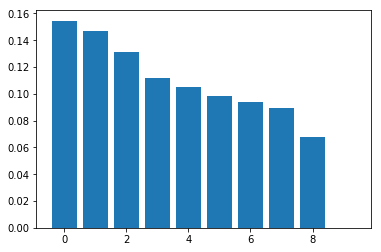

In [284]:
plt.bar(range(result.shape[0]),pca.explained_variance_ratio_)

In [281]:
#plot_2d(result,gender_pairs)